# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data).set_index(pd.Series(labels))

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
# Can't return outside of a method, I assume you meant "print".
print(df.head(3))
print(df.iloc[:3])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
print(df[['animal', 'age']])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
print(df.iloc[[3, 4, 8]][['animal','age']])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
print(df[df['visits'] > 3])

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
print(df[df['age'] == np.nan])

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
print(df[(df['animal'] == 'cat') & (df['age'] < 3)])

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
print(df[(df['age'] <= 4) & (df['age'] >= 2)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [11]:
df.loc['f']['age'] = 1.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
# Using numpy
print(np.sum(df['visits']))

# Using pandas
print(df['visits'].sum())

19
19


```Calculate the mean age for each different animal in `df`.```

In [13]:
animals = set(df['animal'])

print(pd.DataFrame({_animal: [df[df['animal'] == _animal]['age'].mean()] for _animal in animals}))

   cat  snake  dog
0  2.5    2.5  5.0


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:
df2 = pd.DataFrame([['Parakeet', 1, 1, 'yes']], columns=['animal', 'age', 'visits', 'priority']).set_index(pd.Series(['k']))
df = df.append(df2)
df = df.loc[list('abcdefghij')]
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [15]:
animals = set(df['animal'])
print(pd.DataFrame({animal: [len(df[df['animal'] == animal].index)] for animal in animals}))

   cat  snake  dog
0    4      2    4


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
print(df.sort_values('age', ascending=False))
print(df.sort_values('visits'))

  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
b    cat  3.0       3      yes
j    dog  3.0       1       no
a    cat  2.5       1      yes
f    cat  2.0       3       no
c  snake  0.5       2       no
d    dog  NaN       3      yes
h    cat  NaN       1      yes
  animal  age  visits priority
a    cat  2.5       1      yes
g  snake  4.5       1       no
h    cat  NaN       1      yes
j    dog  3.0       1       no
c  snake  0.5       2       no
e    dog  5.0       2       no
i    dog  7.0       2       no
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
df['priority'] = df['priority'] == 'yes'
print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  2.0       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df['animal'] = df['animal'].map(lambda animal: 'python' if animal == 'snake' else animal)
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  2.0       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [19]:
pivot = pd.pivot_table(df, values='age', columns='visits', index='animal', aggfunc=np.mean)
print(pivot)

visits    1    2    3
animal               
cat     2.5  NaN  2.5
dog     3.0  6.0  NaN
python  4.5  0.5  NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
SIZE = 1000
age = np.random.randint(20, 66, SIZE)
skill = np.clip(np.random.normal(0.5, 0.3, SIZE), 0, 1)
height = np.around(np.random.uniform(1.5, 2.0, SIZE), 2)
df = pd.DataFrame({"age": age, "skill": skill, "height": height})

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
def get_salary(row):
    return 1000*((row["age"]**2)/1000 + 1.7*row["skill"] + 0.4*np.exp(-(row["height"] - 1.7)**2))

df["salary"] = df.apply(get_salary, axis=1)

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
age_groups_msd = df['age'].map(lambda x: np.floor(x/10))
by_age_msd = df.groupby(age_groups_msd)
by_age = df.groupby('age')

# Age groups
rows = []
mean_salary = []
max_height = []
for age, group in by_age:
    rows.append(len(group.index))
    mean_salary.append(group['salary'].mean())
    max_height.append(group['height'].max())

# Age MSD groups
rows_msd = []
mean_salary_msd = []
max_height_msd = []
for age, group in by_age_msd:
    rows_msd.append(len(group.index))
    mean_salary_msd.append(group['salary'].mean())
    max_height_msd.append(group['height'].max())

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
mean_salary_normalized = []
for age, group in by_age:
    mean_salary_normalized.append(group['salary'].mean()/group['height'].sum())

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

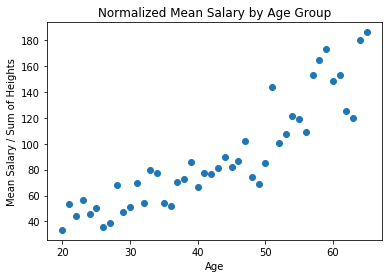

In [25]:
plt.scatter(by_age.groups.keys(), mean_salary_normalized)
plt.title("Normalized Mean Salary by Age Group")
plt.xlabel('Age')
plt.ylabel('Mean Salary / Sum of Heights')
plt.show()

```Save the result as a csv```

In [0]:
out_df = pd.DataFrame({'age': list(by_age.groups.keys()), 'nms': mean_salary_normalized})
out_df.to_csv('mean_salary_normalized.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [42]:
pd.options.display.max_columns=50

min_year = df['YearBuilt'].min()
print('The oldest house was built in %d.' % min_year)

least_year_houses = df[df['YearBuilt'] == min_year]
print('The highest price in that year was %d.' % least_year_houses['SalePrice'].max())

print('The mean area of houses is %f.' % df['LotArea'].mean())

fireplaces = len(df[df['Fireplaces'] > 0])
total = len(df)
if fireplaces > total - fireplaces:
    print('There are more houses with a fireplace than houses without a fireplace.')
elif fireplaces < total - fireplaces:
    print('There are more houses without a fireplace than houses witha fireplace.')
else:
    print('There are exactly as many houses without a fireplace than ones with a fireplace.')
    
mean_price_with_pool = df[df['PoolArea'] > 0]['SalePrice'].mean()
print('The mean price of houses with swimming pools is %f.' % mean_price_with_pool)

The oldest house was built in 1872.
The highest price in that year was 122000.
The mean area of houses is 10516.828082.
There are more houses with a fireplace than houses without a fireplace.
The mean price of houses with swimming pools is 288138.571429.


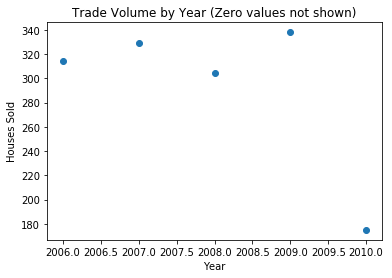

In [30]:
years = list(set(df['YearBuilt']))
trade_volume = [len(df[df['YrSold'] == year]) for year in years]
plt.scatter([years[i] for i in range(len(years)) if trade_volume[i]],
            [trade_volume[i] for i in range(len(years)) if trade_volume[i]])
plt.title('Trade Volume by Year (Zero values not shown)')
plt.xlabel('Year')
plt.ylabel('Houses Sold')
plt.show()

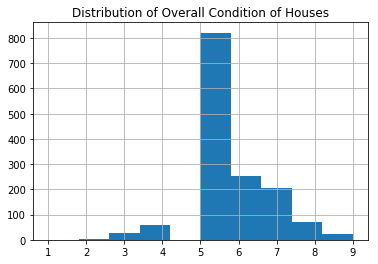

In [31]:
df.hist(column='OverallCond')
plt.title('Distribution of Overall Condition of Houses')
plt.show()

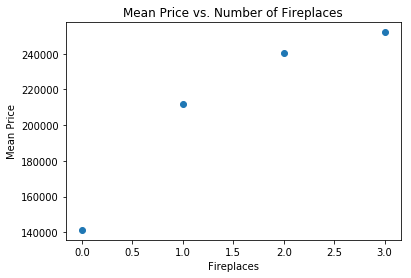

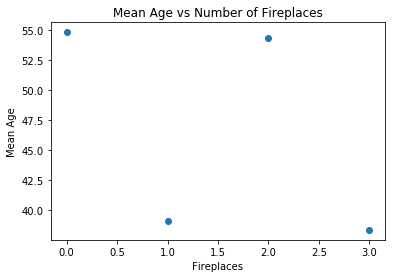

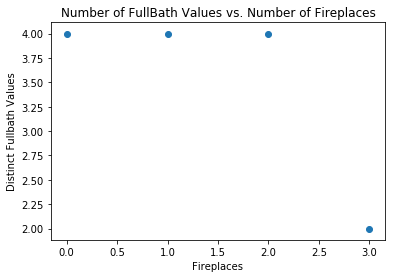

In [32]:
by_fireplaces = df.groupby('Fireplaces')
fireplaces = by_fireplaces.groups.keys()
mean_price = [group['SalePrice'].mean() for _, group in by_fireplaces]
mean_age = [(group['YearBuilt']*(-1) + 2019).mean() for _, group in by_fireplaces]
distinct_fullbath = [len(set(group['FullBath'])) for _, group in by_fireplaces]

plt.scatter(fireplaces, mean_price)
plt.xlabel('Fireplaces')
plt.ylabel('Mean Price')
plt.title('Mean Price vs. Number of Fireplaces')
plt.show()

plt.scatter(fireplaces, mean_age)
plt.xlabel('Fireplaces')
plt.ylabel('Mean Age')
plt.title('Mean Age vs Number of Fireplaces')
plt.show()

plt.scatter(fireplaces, distinct_fullbath)
plt.xlabel('Fireplaces')
plt.ylabel('Distinct Fullbath Values')
plt.title('Number of FullBath Values vs. Number of Fireplaces')
plt.show()

In [33]:
subclass = df[df['MSSubClass'] > 60]
by_subclass = subclass.groupby(lambda i: (df.iloc[i]['MSSubClass'] % 20) == 0)
false_group = by_subclass.get_group(False)
true_group = by_subclass.get_group(True)

false_min = false_group['OverallQual'].min()
false_max = false_group['OverallQual'].max()
false_mean = false_group['OverallQual'].mean()
false_std = false_group['OverallQual'].std()

true_min = true_group['OverallQual'].min()
true_max = true_group['OverallQual'].max()
true_mean = true_group['OverallQual'].mean()
true_std = true_group['OverallQual'].std()

print('Houses with subclass divisible by 20 - mean: %f; min: %f; max: %f; stdev: %f' % (true_mean, true_min, true_max, true_std))
print('Houses with subclass not divisible by 20 - mean: %f; min: %f; max: %f; stdev: %f' % (false_mean, false_min, false_max, false_std))

Houses with subclass divisible by 20 - mean: 6.389908; min: 4.000000; max: 9.000000; stdev: 1.111021
Houses with subclass not divisible by 20 - mean: 5.556180; min: 3.000000; max: 10.000000; stdev: 1.193055


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
def compute_features(df, lot_config=True):
    df['MetricLotArea'] = 0.092903*df['LotArea']
    df['CombinedSF'] = df['1stFlrSF'] + df['2ndFlrSF']
    df['GarageSize'] = np.sqrt(df['GarageArea'])
    df['AreaPerBedroom'] = df['LotArea'] / (df['BedroomAbvGr'] + 1)

    by_year = df.groupby('YearBuilt').agg(np.mean)
    df['AreaFactor'] = df.apply(lambda row: row['LotArea'] / (by_year.loc[row['YearBuilt']]['LotArea'] + 1e-5), axis=1)
    df['AreaRank'] = df['LotArea'].rank(method='dense', ascending=True)
    if lot_config:
        config_encoding = pd.get_dummies(df['LotConfig'], prefix='LotConfig')
        df = pd.concat([df, config_encoding], axis=1)
    out = ['MetricLotArea', 'CombinedSF', 'GarageSize', 'AreaPerBedroom', 'AreaFactor', 'AreaRank']
    if lot_config:
        out += list(df.columns[pd.Series(df.columns).str.startswith('LotConfig_')])
    return out, df

new_features, df = compute_features(df)

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/pyth

Loss: 0.395005


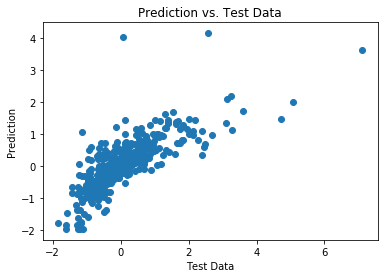

In [37]:
X = df[new_features]
y = df[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
scaler = StandardScaler().fit(X_train)
scaler2 = StandardScaler().fit(y_train)
regr = LinearRegression()
regr.fit(scaler.transform(X_train), scaler2.transform(y_train))
y_test_prediction = regr.predict(scaler.transform(X_test))
y_train_prediction = regr.predict(scaler.transform(X_train))
print('Loss: %f' % mean_squared_error(scaler2.transform(y_test), y_test_prediction))
plt.scatter(scaler2.transform(y_test), y_test_prediction)
plt.title('Prediction vs. Test Data')
plt.ylabel('Prediction')
plt.xlabel('Test Data')
plt.show()

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [38]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')
features, df = compute_features(df, lot_config=False)
new_features = []

for feature in features:
    new_features.append(feature + '2')
    new_features.append(feature + '3')
    df[feature + '2'] = df[feature]**2
    df[feature + '3'] = df[feature]**3
features += new_features
print(features)

['MetricLotArea', 'CombinedSF', 'GarageSize', 'AreaPerBedroom', 'AreaFactor', 'AreaRank', 'MetricLotArea2', 'MetricLotArea3', 'CombinedSF2', 'CombinedSF3', 'GarageSize2', 'GarageSize3', 'AreaPerBedroom2', 'AreaPerBedroom3', 'AreaFactor2', 'AreaFactor3', 'AreaRank2', 'AreaRank3']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by 

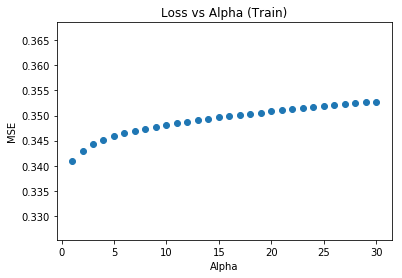

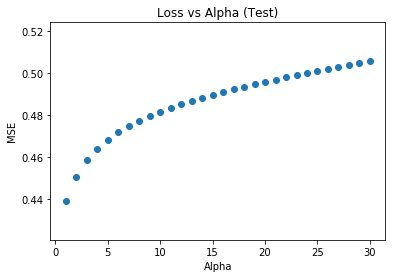

In [39]:
train_loss = []
test_loss = []
alphas = list(range(1, 31))

X = df[features]
y = df[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

scaler = StandardScaler().fit(X_train)
scaler2 = StandardScaler().fit(y_train)
reg_X_train = scaler.transform(X_train)
reg_X_test = scaler.transform(X_test)
reg_y_train = scaler2.transform(y_train)
reg_y_test = scaler2.transform(y_test)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(reg_X_train, reg_y_train)
    y_pred = ridge.predict(reg_X_test)
    y_pred_train = ridge.predict(reg_X_train)
    train_loss.append(mean_squared_error(reg_y_train, y_pred_train))
    test_loss.append(mean_squared_error(reg_y_test, y_pred))
    
plt.scatter(alphas, train_loss)
plt.title('Loss vs Alpha (Train)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

plt.scatter(alphas, test_loss)
plt.title('Loss vs Alpha (Test)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

## Something is obviously very wrong with these graphs. The test graph should be decreasing while the train graph increases as $\alpha$ goes up. This is because increasing alpha reduces the model's complexity, and as such makes it fit the train data worse, but makes it better at predicting unknown data. If you have any idea why this is, please let me know. I cannot make a recommendation for a specific value of $\alpha$, but the optimum is probably higher than 1.